In [3]:
import pandas as pd
import numpy as np

# Pandas

*pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.*

[Pandas Website](http://pandas.pydata.org)

This tutorial pulls from the Pandas website and the Handson-ML tutorial: https://github.com/ageron/handson-ml

## Basic Data Structures: Series and Objects

See: https://pandas.pydata.org/pandas-docs/stable/dsintro.html

### Series are a 1D array or a single column vector

In [20]:
v = pd.Series(np.random.randn(5))
v

0    0.688002
1    0.046689
2    0.481630
3    1.102089
4    1.399440
dtype: float64

In [21]:
type(v)

pandas.core.series.Series

In [22]:
d = {'a' : 0., 'b' : 1., 'c' : 2.} # dictionary object
d

{'a': 0.0, 'b': 1.0, 'c': 2.0}

In [23]:
d_v = pd.Series(d)  # convert dictionary to series
d_v

a    0.0
b    1.0
c    2.0
dtype: float64

In [24]:
d_v['b'] # by index value

1.0

In [25]:
d_v[2]   # by row position

2.0

In [26]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [27]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

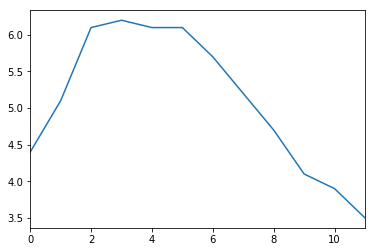

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [30]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [31]:
temp_series = pd.Series(temperatures, dates)
temp_series  # where dates is the index

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

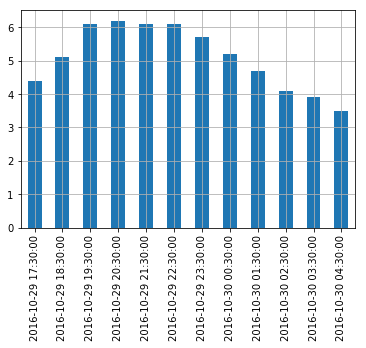

In [32]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

### Dataframes

Dataframes are a 2-dimensional labeled data structure with columns of potentially different types

In [34]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Transpose

In [36]:
people.T

,alice,bob,charles
birthyear,1985,1984,1992
children,NaN,3,0
hobby,Biking,Dancing,NaN
weight,68,83,112


In [38]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [39]:
people.loc['charles']

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

In [42]:
people['charles'] # error

KeyError: 'charles'

In [40]:
people[['weight']]

,weight
alice,68
bob,83
charles,112


In [43]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [44]:
people.iloc[2]  # return the row 3

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

In [45]:
people.iloc[1:3] # return slice of rows, from 2-3

,birthyear,children,hobby,weight
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [46]:
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


In [47]:
people["age"] = 2016 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,31,True
bob,Dancing,83,32,True
charles,NaN,112,24,False


In [48]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [49]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,31,True,NaN
bob,Dancing,83,32,True,0.0
charles,NaN,112,24,False,5.0


In [51]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,31,True,NaN
bob,Dancing,181,83,32,True,0.0
charles,NaN,185,112,24,False,5.0


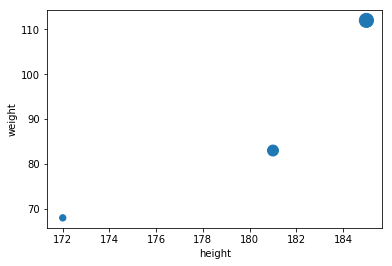

In [52]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

In [53]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0.0,25.335002,False
charles,NaN,185,112,24,False,5.0,32.724617,True


In [54]:
people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, alice to charles
Data columns (total 6 columns):
hobby      2 non-null object
height     3 non-null int64
weight     3 non-null int64
age        3 non-null int64
over 30    3 non-null bool
pets       2 non-null float64
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 227.0+ bytes


In [55]:
people.describe()

,height,weight,age,pets
count,3.000000,3.000000,3.000000,2.000000
mean,179.333333,87.666667,29.000000,2.500000
std,6.658328,22.368132,4.358899,3.535534
min,172.000000,68.000000,24.000000,0.000000
25%,176.500000,75.500000,27.500000,1.250000
50%,181.000000,83.000000,31.000000,2.500000
75%,183.000000,97.500000,31.500000,3.750000
max,185.000000,112.000000,32.000000,5.000000
